In [13]:
import os
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt

model = AutoModelForImageClassification.from_pretrained("EdBianchi/vit-fire-detection")
feature_extractor = AutoFeatureExtractor.from_pretrained("EdBianchi/vit-fire-detection")
id2label = {0: "fire", 1: "no_fire"}

data_dir = "../data/guardian/"

c:\Users\ranyk\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [14]:
frames = os.listdir(data_dir + "frames/")


for i in range(len(frames)):
    print(f"{i + 1} / {len(frames)}", end = "\r")
    img = Image.open(data_dir + "frames/" + frames[i])
    inputs = feature_extractor(images=img, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, output_attentions=True)

    attentions = outputs.attentions
    heads = attentions[-1][0]
    mean_heads = torch.mean(heads, dim=0)
    mean_heads = mean_heads[:, 1:,]
    plt.imshow(mean_heads[0].reshape(14, 14).numpy(), cmap='hot', interpolation='nearest')
    #plt.title("Self-Attention Map of CLS token (What the model sees as important)")
    plt.savefig(f"{data_dir}attention_maps/attn_{i}.png")
    plt.clf()

    plt.barh(list(id2label.values()), outputs.logits.softmax(-1).squeeze().detach().numpy()[:2], color=["red", "blue"])
    plt.xlim([0, 1])
    plt.savefig(f"{data_dir}predictions/pred_{i}.png")
    plt.clf()


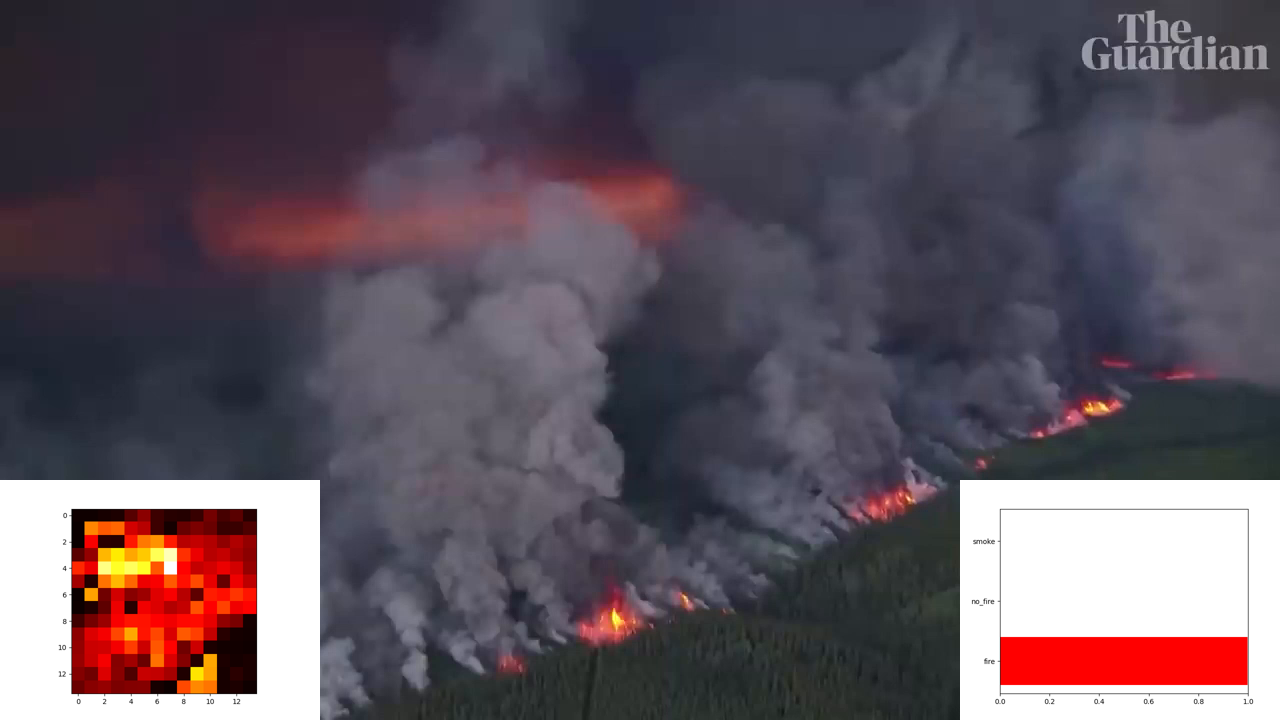

In [ ]:
for i in range(len(frames)):
    print(f"{i + 1} / {len(frames)}", end = "\r")
    img1 = Image.open(data_dir + "frames/" + frames[i])
    img2 = Image.open(f"{data_dir}attention_maps/attn_{i}.png")
    img3 = Image.open(f"{data_dir}predictions/pred_{i}.png")

    img2 = img2.resize((img2.size[0] // 2, img2.size[1] // 2))
    img3 = img3.resize((img3.size[0] // 2, img3.size[1] // 2))

    img1.paste(img2, (0, img1.size[1] - img2.size[1]))
    img1.paste(img3, (img1.size[0] - img3.size[0], img1.size[1] - img3.size[1]))

img1.save(f"{data_dir}final/final_{i}.png")